<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Theoretical-recall:-multi-class-and-multi-label-classification" data-toc-modified-id="Theoretical-recall:-multi-class-and-multi-label-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Theoretical recall: multi-class and multi-label classification</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Load-the-datatest" data-toc-modified-id="Load-the-datatest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the datatest</a></span></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building the network</a></span></li><li><span><a href="#Validating-your-approach" data-toc-modified-id="Validating-your-approach-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Validating your approach</a></span></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Plotting-the-training-and-validation-loss-&amp;-accuracy" data-toc-modified-id="Plotting-the-training-and-validation-loss-&amp;-accuracy-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plotting the training and validation loss &amp; accuracy</a></span></li><li><span><a href="#Retrain-the-model-from-scratch" data-toc-modified-id="Retrain-the-model-from-scratch-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Retrain the model from scratch</a></span></li><li><span><a href="#Generating-predictions-for-new-data" data-toc-modified-id="Generating-predictions-for-new-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Generating predictions for new data</a></span></li><li><span><a href="#References" data-toc-modified-id="References-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Classifying newswires with Reuters dataset

</font>
</div>

# Theoretical recall: multi-class and multi-label classification
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- **single-label, multiclass classification** = each data point should be classified into only one category
- **multilabel, multiclass classification** = if each data point could belong to multiple categories
- The Reuters dataset is a case of the first instance.

</font>
</div>

# Import modules
<hr style = "border:2px solid black" ></hr>

In [23]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20

# Load the datatest
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986.
- Widely used toy dataset for text classification.
- There are 46 different topics.
- Some topics are more represented than others
- Each topic has at least 10 examples in the training set.
- num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

</font>
</div>

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
# Decoding newslater back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [8]:
# The label associated with an example is an integer between 0 and 45—a topic index
train_labels[10]

3

<div class="alert alert-info">
<font color=black>

- To vectorise the label we'll use one-hot encoding.
- One-hot encoding is also calle categorical encoding.
- One-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

</font>
</div>

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

<div class="alert alert-info">
<font color=black>

- Note that there is a built-in way to do this in Keras

</font>
</div>

In [14]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building the network
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- You end the network with a Dense layer of size 46. 
- This means for each input sample, the network will output a 46-dimensional vector.
- The last layer uses a softmax activation.
- The network will produce a 46- dimensional output vector.
- For instance: output[i] is the probability that the sample belongs to class i. 
- The 46 scores will sum to 1.

</font>
</div>

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

<div class="alert alert-info">
<font color=black>

- **categorical_crossentropy** measures the distance between two probability distributions
- Distance between the probability distribution output by the network and the true distribution of the labels.
- By minimizing the distance between these two distributions, you train the network to output some- thing as close as possible to the true labels.

</font>
</div>

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Validating your approach
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Let’s set apart 1,000 samples in the training data to use as a validation set.
- Please remember that this is a part of the training set.
- You end up with 3 sets:
- **[1]** train
- **[2]** validation
- **[3]** test

</font>
</div>

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 12s 55ms/step - loss: 3.1204 - accuracy: 0.3893 - val_loss: 1.7625 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.5113 - accuracy: 0.7028 - val_loss: 1.2958 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0913 - accuracy: 0.7641 - val_loss: 1.1085 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8190 - accuracy: 0.8275 - val_loss: 1.0116 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6597 - accuracy: 0.8629 - val_loss: 0.9693 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5199 - accuracy: 0.8940 - val_loss: 0.9265 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4305 - accuracy: 0.9108 - val_loss: 0.9160 - val_accuracy: 0.8140
Epoch 8/20
1

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss & accuracy
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The NNs starts to overfitting at around 9 epoches.
- Look at the loss function, after the 9th epich the red curve line start to grow
- This is also see by a drop in accuracy.
- The model starts to overfitts which means that the 

</font>
</div>

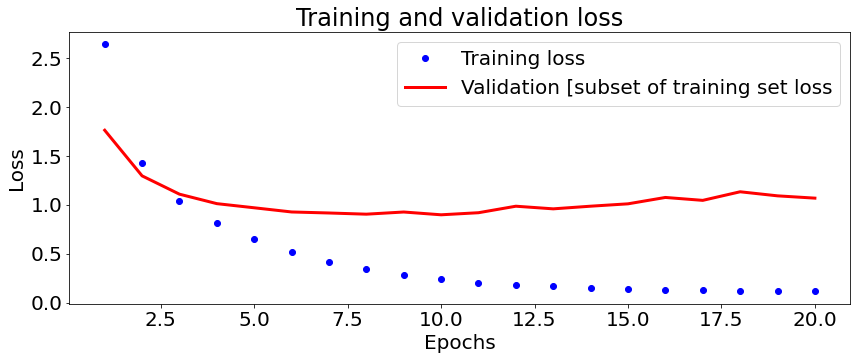

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', lw = 3, label='Validation [subset of training set loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

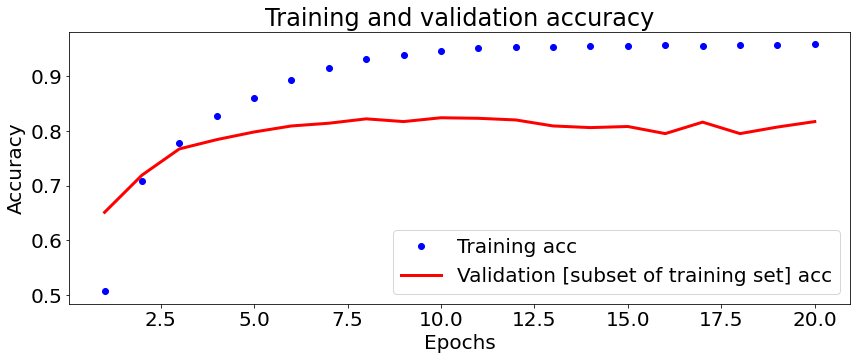

In [37]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r-', lw =3, label='Validation [subset of training set] acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retrain the model from scratch

<div class="alert alert-block alert-info">
<font color=black><br>

- We now stop the training at the 9th epoch 
- This approach reaches an accuracy of ~80%. 
- With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. 

<br></font>
</div>

In [38]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 3.0817 - accuracy: 0.3734 - val_loss: 1.6784 - val_accuracy: 0.6390
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.4823 - accuracy: 0.6899 - val_loss: 1.2967 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.0523 - accuracy: 0.7733 - val_loss: 1.1267 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.8291 - accuracy: 0.8225 - val_loss: 1.0551 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6596 - accuracy: 0.8584 - val_loss: 0.9785 - val_accuracy: 0.7890
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5423 - accuracy: 0.8854 - val_loss: 0.9260 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4189 - accuracy: 0.9149 - val_loss: 0.9175 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [39]:
results

[0.9856579899787903, 0.7898486256599426]

# Generating predictions for new data
<hr style = "border:2px solid black" ></hr>

In [42]:
predictions = model.predict(x_test)

In [43]:
# Each entry in predictions is a vector of length 46: >>> 
predictions[0].shape

(46,)

In [44]:
#The coefficients in this vector sum to 1:
np.sum(predictions[0])

1.0

In [45]:
# The largest entry is the predicted class—the class with the highest probability:
np.argmax(predictions[0])

3

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- Chollet, Francois. Deep learning with Python. Vol. 361. New York: Manning, 2018.<br>

</font>
</div>